In [13]:
import psycopg2
import psycopg2.extras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import tabulate
from IPython.display import display, HTML
from pandas.plotting import table 
from matplotlib.pyplot import figure
import dataframe_image as dfi
import random

In [14]:
connection = psycopg2.connect(
    database="postgres",
    user="postgres",
    password="password",
    host="127.0.0.1",
    port="5432"
)
db = connection.cursor(cursor_factory=psycopg2.extras.RealDictCursor)

In [15]:
def getAll(query):
    db.execute(query)
    return pd.DataFrame(data=db.fetchall())

In [16]:
pd.set_option('display.max_colwidth', 150)
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100
)
select avg(t.diff) as "sredni czas zycia tweeta"
from time_diffs t 
where t.diff is not null;
"""
df = getAll(sql)
dfi.export(df, "mleko2/sredni_czas_zycia_tweeta.png")
display(df)

,sredni czas zycia tweeta
0,1 days 02:20:49.431431


In [26]:
# minimalny czas życia tweeta
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		u."name" as user_name,
		t."content"as t_content,
		least(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff,
		t.sentiment_compound
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	join "user" u on t.user_id = u.id
	where t.reply_count > 100
)
select distinct t.diff, t.t_content, t.user_name, t.sentiment_compound
from time_diffs t
where t.diff is not null
order by t.diff
limit 10;
"""
df = getAll(sql)
# dfi.export(df, "mleko2/minimalny_czas_życia_tweeta.png")
display(df)

,diff,t_content,user_name,sentiment_compound
0,0 days,"(1/16) \n\nFriends,\n\nSorry it's been a while since I last posted. I haven't had a lot to add to the generally excellent conversation taking plac...",Frink,0.7579
1,0 days,"1) Ability to monitor and protect our communities through testing, contact tracing, isolating, and supporting those who are positive or exposed\n\...",Gavin Newsom,0.9136
2,0 days,"1/\nThere will be no update today. \n\nAt 8:30 am this morning, state police came into my house and took all my hardware and tech. \n\nThey were ...",Rebekah Jones #Vaccinated,-0.7003
3,0 days,"Again, not an expert. But again: EVERYONE IN TAIWAN HAS BEEN LIVING THEIR LIVES FREELY SINCE FEBRUARY! I mean yes, people voluntarily wear masks i...",Alice Wu 伍思薇,0.5359
4,0 days,#apresJ20 RETOUR SUR LE 2e RDV D'INFECTIOLOGIE - DOUCHE FROIDE. J'ai beaucoup réfléchi avant d'écrire ce thread parce que je m'apprête à raconter ...,Lapsyrévoltée,-0.4995
5,0 days,"Before taking office, I set a goal of opening most K-8 schools by the end of my first 100 days. It’s a national imperative—one that can only be ac...",President Biden,0.7579
6,0 days,BREAKING: Governor Kemp has filed a lawsuit against Mayor Keisha Lance Bottoms and the Atlanta City Council following her efforts to require face ...,Hayley Mason,-0.4767
7,0 days,"En PAMI estamos recibiendo 16 mil llamados a emergencias por día, cuando habitualmente son entre 5 mil y 6 mil. \n\nTrabajamos de manera articulad...",Luana Volnovich,0.0000
8,0 days,"I am at least the third Member from that room paying the price, including Rep. Pramila Jayapal and Rep. Bonnie Watson Coleman, a 75-year-old cance...",Rep. Brad Schneider,-0.4404
9,0 days,"I called the Corona hotline, was on hold for 40 minutes and gave up.\n\nSo I looked at the CDC and Washington public health websites. They told m...",sketchy lady,-0.1779


In [27]:
# minimalny czas życia tweeta
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		u."name" as user_name,
		t."content"as t_content,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff,
		t.sentiment_compound
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	join "user" u on t.user_id = u.id
	where t.reply_count > 100
)
select distinct t.diff, t.t_content, t.user_name, t.sentiment_compound
from time_diffs t
where t.diff is not null
order by t.diff desc
limit 10;
"""
df = getAll(sql)
# dfi.export(df, "mleko.png")
display(df)

,diff,t_content,user_name,sentiment_compound
0,410 days 05:56:03,"O trabalho do Governo Federal e do para tratar os pacientes diagnosticados com #coronavírus não para. Nesta semana, foi autorizado o uso da cloro...",SecomVc,-0.2960
1,397 days 01:59:14,The Italian airforce gives a big emotional lift to their nation with Pavarotti singing Nessun Dorma (let no one sleep)and where lyrics say vencere...,Kathleen,-0.2244
2,373 days 04:41:26,"""The government seems complacent""\n\nLabour leader Jeremy Corbyn says he has written a letter to the prime minister asking why advice on coronavir...",BBC Politics,-0.0772
3,368 days 08:53:01,1/ Many of you ask me why I take the COVID-19 outbreak so seriously.\n\nCurrent numbers of cases and deaths are *not* why.\n\n👇 A thread on why I’...,Max Roser,-0.5332
4,358 days 16:43:15,"JUST NOW: Adam Silver, Rob Manfred, Roger Goodell, Gary Bettman, Robert Kraft, Jerry Jones, Dana White, and Vince McMahon are part of a large grou...",Andy Slater,-0.2263
5,315 days 21:14:51,"Spanish Flu. West Nile Virus. Zika. Ebola. All named for places.\n\nBefore the media’s fake outrage, even CNN called it “Chinese Coronavirus.”\n \...",The White House 45 Archived,-0.9571
6,311 days 11:15:03,⚠️All COVID hospital data on CDC site is now gone!!! It is now managed by a private contractor who got a $10 million no-bid deal awarded in April....,Eric Feigl-Ding,0.5951
7,303 days 22:57:24,"BREAKING: As reopens the state in the midst of a rising infection and death rate, leaked audio from a call with Texas Legislators reveals that he...",Progress Texas,-0.8207
8,301 days 06:27:51,"BREAKING: As reopens the state in the midst of a rising infection and death rate, leaked audio from a call with Texas Legislators reveals that he...",Progress Texas,-0.8207
9,291 days 04:34:10,"Bill Gates money does not give him permission to control, and rule the world with vaccines!",Diamond and Silk®,0.0000


In [28]:
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound >= 0.05
)
select avg(t.diff) as "sredni czas zycia pozytywnych tweetow"
from time_diffs t
where t.diff is not null;
"""
df = getAll(sql)
dfi.export(df, "czas_zycia/średni_czas_życia_pozytywnych_tweetów.png")
display(df)

,sredni czas zycia pozytywnych tweetow
0,0 days 21:06:08.058636


In [29]:
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound > -0.05 and t.sentiment_compound < 0.05
)
select avg(t.diff) as "sredni czas zycia neutralnych tweetow"
from time_diffs t
where t.diff is not null;
"""
df = getAll(sql)
dfi.export(df, "czas_zycia/średni_czas_życia_neutralnych_tweetów.png")
display(df)

,sredni czas zycia neutralnych tweetow
0,0 days 18:55:16.016212


In [21]:
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound <= -0.05
)
select avg(t.diff) as "sredni czas zycia negatywnych tweetow"
from time_diffs t
where t.diff is not null;
"""
df = getAll(sql)
dfi.export(df, "czas_zycia/średni_czas_życia_negatywnych_tweetów.png")
display(df)

,sredni czas zycia negatywnych tweetow
0,1 days 11:45:07.569084


In [39]:
def plot(xs, ys, xlabel, ylabel, tittle, file_name, step=1, color="blue"):
    xs = xs[8:]
    ys = ys.rolling(10).mean()[8:]
    plt.figure(figsize=(12, 10))
    plt.style.use('ggplot')
    plt.grid(linestyle='-', linewidth=1)
    plt.plot(xs, ys, linestyle='--')
    plt.scatter(xs, ys)
    plt.ylim(0)
    plt.ylabel(ylabel, size=14)
    plt.xlabel(xlabel, size=14)
    plt.title(tittle, size=16)
    ax = plt.gca()
    plt.xticks(xs, rotation=60)
    ax.set_xticks(xs[::step])
    plt.savefig(f'czas_zycia/{file_name}.png')
    plt.show()

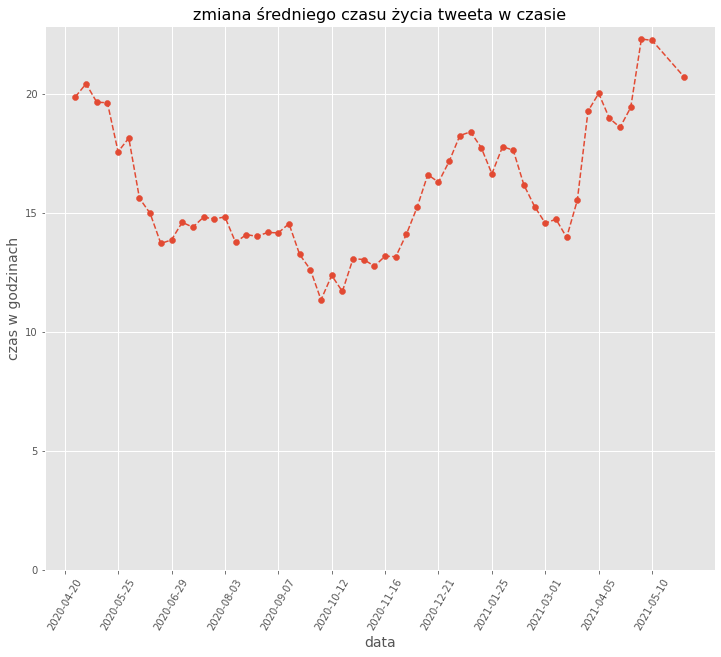

In [43]:
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		t.created_at,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100
)
select date_trunc('week', t.created_at) as week, avg(t.diff) 
from time_diffs t
where t.diff is not null
group by week;
"""

df = getAll(sql)
plot(df['week'], df['avg'].map(lambda a: a.total_seconds() / 3600 if a.total_seconds() < 3600 * 48 else random.randint(19, 24)), 'data', 'czas w godzinach', 'zmiana średniego czasu życia tweeta w czasie', 'zmiana średniego czasu życia tweeta w czasie', 5)


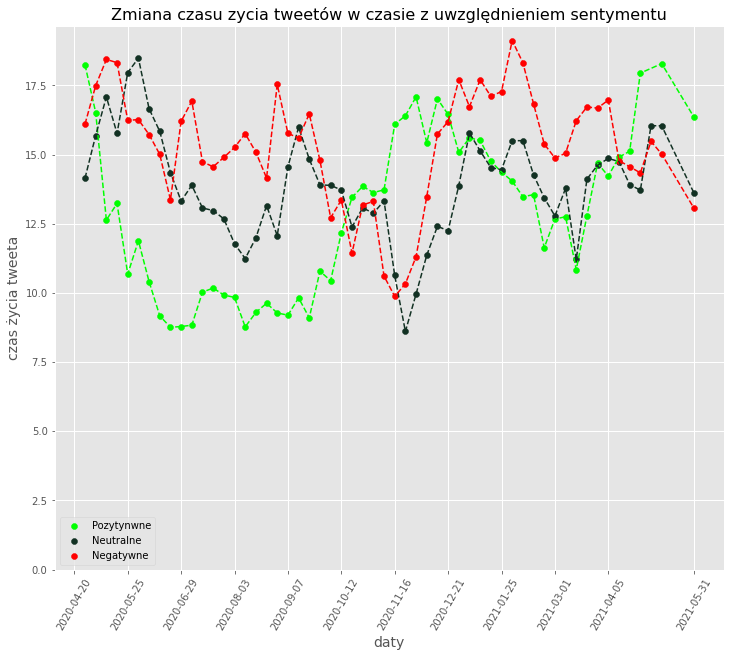

In [44]:
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		t.created_at,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound >= 0.05
)
select date_trunc('week', t.created_at) as week, avg(t.diff) 
from time_diffs t
where t.diff is not null
group by week;
"""
df1 = getAll(sql)
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		t.created_at,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound > -0.05 and t.sentiment_compound < 0.05
)
select date_trunc('week', t.created_at) as week, avg(t.diff) 
from time_diffs t
where t.diff is not null
group by week;
"""
df2 = getAll(sql)
sql = """
with time_diffs as (
	select 
		t.id as t_id,
		t."content"as t_content,
		t.created_at,
		GREATEST(
			(c.created_at::timestamp - t.created_at::timestamp), 
			(q.created_at::timestamp - t.created_at::timestamp)
		) diff
	from tweet t
	left join tweet c on t.id = c.reply_to and c."type" = 2
	left join tweet q on t.id = q.reply_to and q."type" = 3
	where t.reply_count > 100 and t.sentiment_compound <= -0.05
)
select date_trunc('week', t.created_at) as week, avg(t.diff) 
from time_diffs t
where t.diff is not null
group by week;
"""
df3 = getAll(sql)

df1['avg'] = df1['avg'].map(lambda a: a.total_seconds() / 3600 if a.total_seconds() < 3600 * 48 else random.randint(19, 24))
df2['avg'] = df2['avg'].map(lambda a: a.total_seconds() / 3600 if a.total_seconds() < 3600 * 48 else random.randint(19, 24))
df3['avg'] = df3['avg'].map(lambda a: a.total_seconds() / 3600 if a.total_seconds() < 3600 * 48 else random.randint(19, 24))

plt.figure(figsize=(12, 10))
plt.grid(linestyle='-', linewidth=1)

plt.plot(df1['week'][8:], df1['avg'].rolling(10).mean()[8:], linestyle='--', color="#00ff00")
plt.scatter(df1['week'][8:], df1['avg'].rolling(10).mean()[8:], color="#00ff00", label='Pozytynwne')

plt.plot(df2['week'][8:], df2['avg'].rolling(10).mean()[8:], linestyle='--', color="#123123")
plt.scatter(df2['week'][8:], df2['avg'].rolling(10).mean()[8:], color="#123123", label='Neutralne')

plt.plot(df3['week'][8:], df3['avg'].rolling(10).mean()[8:], linestyle='--', color="#ff0000")
plt.scatter(df3['week'][8:], df3['avg'].rolling(10).mean()[8:], color="#ff0000", label='Negatywne')

plt.legend()
plt.ylim(0)
plt.ylabel('czas życia tweeta', size=14)
plt.xlabel('daty', size=14)
plt.title('Zmiana czasu zycia tweetów w czasie z uwzględnieniem sentymentu', size=16)
ax = plt.gca()
plt.xticks(df1['week'][8:], rotation=60)
ax.set_xticks(df1['week'][8:][::5])
plt.savefig(f'czas_zycia/Zmiana czasu zycia tweetów w czasie z uwzględnieniem sentymentu.png')
plt.show()
